<a href="https://colab.research.google.com/github/tzuyichao/python-basic/blob/master/colab/chapter3_boston_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [3]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [4]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df = pd.DataFrame(train_data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [5]:
order = np.random.randint(0, 404, size=404)
print(order)

[306 299  25  70 387 249 117 253 232 228 239 123  63 338  94 366  36 369
 235 191 283 166 121 241 393  44 103 338 198 183  35  18 161  68 363 220
 227  99  49  18 208 157 399  81 323 185 104 142 230 125 214  80 255 133
 111 158 150  26 378  40  24 260 194 347 184 177  18 201 158 346 351  56
  23  41 284  59 287 352 336 266 116 380 303  76  55 243 234 119 207 336
 344 324 222 325  70  50 322 369 283  71 360  19 195  40 111 346 119 194
  24 144 256 186 267 239 280 377 104 366 153  70  99 148 326 253  64 240
 258 117 195 334  72  21 247 117 384 202 122 140 306 373 299 374 305 401
 304 340  26 270 385  96 241 205 183 152 167 362 139 243 311  34 306 382
  78 356 108 107 380 340 225  25 302  76 396 254  66 277 337 161 299 373
 250 163 326  25 286  42 268 184  19 337 301 136 343 350 162 207  81 221
 123 179 162 298 135 160 250  24 394 168 133 227  67 210 205  19 379 123
 377 215 103 278 114 340 390 154 253 360  30  81  50 151 170 110 371 338
 280 203 381 298 166 164 228 118 314 364 253 125  3

In [6]:
train_data = train_data[order]
train_labels = train_labels[order]

print(train_data.shape)
print(train_labels.shape)

(404, 13)
(404,)


In [7]:
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [8]:
print(train_data)

[[4.01100e-02 8.00000e+01 1.52000e+00 ... 1.26000e+01 3.96900e+02
  4.08000e+00]
 [1.28023e+01 0.00000e+00 1.81000e+01 ... 2.02000e+01 2.40520e+02
  2.37900e+01]
 [9.82349e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.96900e+02
  2.12400e+01]
 ...
 [3.52330e-01 0.00000e+00 2.18900e+01 ... 2.12000e+01 3.94080e+02
  1.45900e+01]
 [9.92485e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.88520e+02
  1.64400e+01]
 [1.38100e-02 8.00000e+01 4.60000e-01 ... 1.44000e+01 3.94230e+02
  2.97000e+00]]


In [9]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data = (train_data - mean)/std
test_data = (test_data - mean)/std

In [10]:
df = pd.DataFrame(train_data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.418696,2.640856,-1.347353,-0.234159,-1.240199,1.405745,-1.205305,1.585849,-0.837121,-0.468875,-2.547922,0.444622,-1.173902
1,0.976060,-0.541147,1.051083,-0.234159,1.640675,-0.554424,1.025661,-0.958060,1.708322,1.574022,0.778950,-1.296347,1.501586
2,0.650512,-0.541147,1.051083,-0.234159,1.049067,0.731381,1.104191,-1.210694,1.708322,1.574022,0.778950,0.444622,1.155442
3,-0.404345,-0.541147,-0.567644,-0.234159,-0.862942,-0.789699,-1.216014,0.547966,-0.721419,-1.050828,-0.227866,0.444622,-0.341799
4,-0.410585,-0.541147,-0.328958,-0.234159,-0.245612,0.713599,0.122566,-0.506694,-0.490015,-0.135465,1.085372,0.429927,-0.686586


In [18]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(13,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(loss='mse', optimizer=Adam(lr=0.001), metrics=['mae'])

# 設定Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=20)

print(train_data)
print(train_labels)

# 訓練模型
history = model.fit(train_data, train_labels, batch_size=32, epochs=500, validation_split=0.2, callbacks=[early_stop])


[[-0.41869575  2.64085581 -1.34735288 ... -2.54792177  0.4446223
  -1.17390213]
 [ 0.97606041 -0.54114728  1.05108255 ...  0.77895002 -1.29634669
   1.50158634]
 [ 0.65051177 -0.54114728  1.05108255 ...  0.77895002  0.4446223
   1.15544247]
 ...
 [-0.3845738  -0.54114728  1.59933769 ...  1.2166963   0.41322741
   0.25275357]
 [ 0.66158922 -0.54114728  1.05108255 ...  0.77895002  0.35132827
   0.50387755]
 [-0.42157003  2.64085581 -1.50069073 ... -1.75997845  0.41489735
  -1.32457652]]
[33.3 10.8 13.3 19.3 26.5 19.1 18.9 13.9 23.3 24.3 15.  44.  19.5 12.8
 38.7 32.7 13.9 19.  22.8 48.8 23.9 20.6 18.2 10.5 20.  12.7 26.6 12.8
 23.4 30.5 25.  24.1 23.6  6.3 33.2 17.8 21.4 28.7 15.1 24.1 20.4 23.7
 19.4 43.5 20.8  8.8 15.  13.8 33.1 13.2 12.3 28.6 17.  32.  50.  23.1
 13.5 22.9 25.  15.2 18.5 45.4 21.1 11.9 20.3 25.3 24.1 11.8 23.1 22.
 20.8 14.5 24.  24.7  8.4 29.4 11.7 23.5 33.8 17.4 14.2 22.1 36.2  8.3
 22.  18.5 22.9 20.6 22.2 33.8 50.  19.3 21.7 41.3 19.3 18.7 17.2 19.
 23.9 13.4 19.2

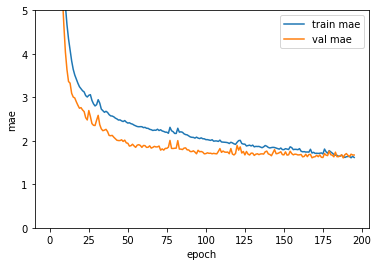

In [20]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel('epoch')
plt.ylabel('mae')
plt.legend(loc='best')
plt.ylim([0, 5])
plt.show()


In [21]:
test_loss, test_mae = model.evaluate(test_data, test_labels)
print('loss:{:.3f}\nmae:{:.3f}'.format(test_loss, test_mae))

4/4 [==============================] - 0s 2ms/step - loss: 22.5494 - mae: 3.0535
loss:22.549
mae:3.054


In [22]:
print('前10筆測試標籤:', np.round(test_labels[0:10]))
test_predictions = model.predict(test_data[0:10]).flatten()
print('前10比預測結果:', np.round(test_predictions))

前10筆測試標籤: [ 7. 19. 19. 27. 22. 24. 31. 23. 20. 23.]
前10比預測結果: [ 9. 18. 22. 35. 25. 20. 27. 23. 20. 27.]
